# Instalações e importações

In [1]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [2]:
import numpy as np
np.__version__

'1.26.4'

In [3]:
import pandas as pd
pd.__version__

'2.2.2'

In [4]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
matplotlib.__version__

'3.10.0'

In [5]:
import seaborn as sns
sns.__version__

'0.13.2'

In [6]:
import scipy
scipy.__version__

'1.13.1'

In [7]:
import sklearn
from sklearn.datasets import fetch_olivetti_faces, load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
sklearn.__version__

'1.6.1'

In [8]:
import sentence_transformers
from sentence_transformers import SentenceTransformer
sentence_transformers.__version__

'3.3.1'

# Sistemas lineares

Vamos resolver o sistema linear apresentado na aula usando álgebra linear:

\begin{cases}
127.35 = x_1 + x_2 + 2x_3 + 2x_4 + 10 \\
128.10 = 2x_1 + 2x_2 + 2x_3 + x_4 + 10 \\
134.85 = 2x_1 + x_2 + 2x_3 + 2x_4 + 10 \\
119.85 = 2x_1 + x_2 + 2x_3 + x_4 + 10
\end{cases}

In [9]:
A = np.array([[1, 1, 1, 2, 2],
              [1, 2, 2, 2, 1],
              [1, 2, 1, 2, 2],
              [1, 2, 1, 2, 1]])
y = np.array([127.35, 128.10, 134.85, 119.85])

In [10]:
A_inv = np.linalg.pinv(A)

In [11]:
x = np.dot(A_inv, y)
x

array([16.32,  7.5 ,  8.25, 32.64, 15.  ])

In [12]:
16.32 * 1 + 7.5 * 1 + 8.25 * 1 + 32.64 * 2 + 15 * 2

127.35

In [13]:
y = np.dot(A, x)
y

array([127.35, 128.1 , 134.85, 119.85])

In [14]:
A = np.array([[1, 1, 1, 2, 2],
              [1, 2, 2, 2, 1],
              [1, 2, 1, 2, 2],
              [1, 2, 1, 2, 1],
              [1, 2, 2, 1, 1]])
y = np.array([127.35, 128.10, 134.85, 119.85, 92.3])

In [15]:
A_inv = np.linalg.pinv(A)
x = np.dot(A_inv, y)
x

array([10.  ,  7.5 ,  8.25, 35.8 , 15.  ])

# Redes neurais

In [16]:
A = np.array([[1, 1, 1, 2, 2],
              [1, 2, 2, 2, 1],
              [1, 2, 1, 2, 2],
              [1, 2, 1, 2, 1]])
y = np.array([127.35, 128.10, 134.85, 119.85])

In [17]:
np.random.seed(6)

In [18]:
W_1 = np.random.randn(5, 4)
W_1

array([[-0.31178367,  0.72900392,  0.21782079, -0.8990918 ],
       [-2.48678065,  0.91325152,  1.12706373, -1.51409323],
       [ 1.63929108, -0.4298936 ,  2.63128056,  0.60182225],
       [-0.33588161,  1.23773784,  0.11112817,  0.12915125],
       [ 0.07612761, -0.15512816,  0.63422534,  0.810655  ]])

In [19]:
b_1 = np.random.randn(4)
b_1

array([ 0.35480861,  1.81259031, -1.3564758 , -0.46363197])

In [20]:
out_1 = np.dot(A, W_1) + b_1
out_1

array([[-1.32397264,  5.19017152,  4.11039629, -0.39538224],
       [-2.24758982,  5.8286576 ,  7.23451523, -2.11830822],
       [-3.81075329,  6.10342305,  5.23746001, -1.90947547],
       [-3.8868809 ,  6.2585512 ,  4.60323467, -2.72013047]])

In [21]:
W_2 = np.random.rand(4, 1)
W_2

array([[0.71727585],
       [0.99420744],
       [0.25561406],
       [0.67130943]])

In [22]:
b_2 = np.random.rand(1)
b_2

array([0.59900591])

In [23]:
out_2 = np.dot(out_1, W_2) + b_2
out_2

array([[5.59471069],
       [5.20896226],
       [3.99063272],
       [3.38394053]])

In [24]:
y

array([127.35, 128.1 , 134.85, 119.85])

In [25]:
error = y - out_2.reshape(y.shape)
error

array([121.75528931, 122.89103774, 130.85936728, 116.46605947])

In [26]:
error.mean()

122.99293845140815

# Eigendecomposition

In [27]:
faces = fetch_olivetti_faces(shuffle=True, random_state=2).data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [28]:
faces.shape, 64 * 64

((400, 4096), 4096)

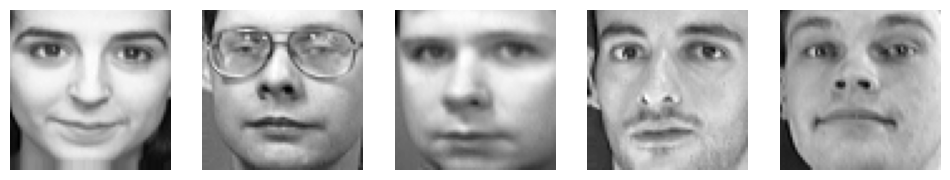

In [29]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
  ax[i].imshow(faces[i].reshape(64, 64), cmap='gray')
  ax[i].axis('off')

In [30]:
mean = np.mean(faces, axis=0)
faces_centered = faces - mean

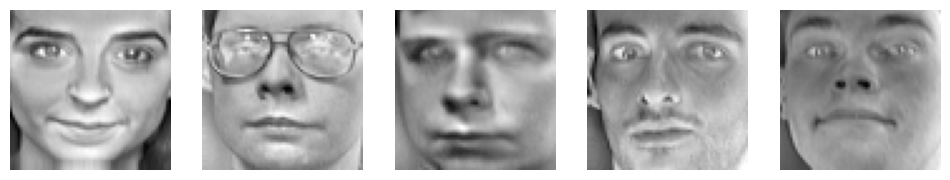

In [31]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(faces_centered[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

<Axes: >

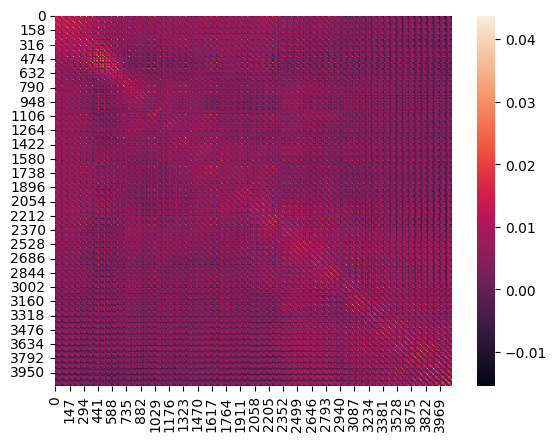

In [32]:
faces_cov = np.cov(faces_centered.T)
sns.heatmap(faces_cov)

In [33]:
l, Q = np.linalg.eigh(faces_cov)
l.shape, Q.shape

((4096,), (4096, 4096))

In [34]:
idx = l.argsort()[::-1]
l = l[idx]
Q = Q[:, idx]

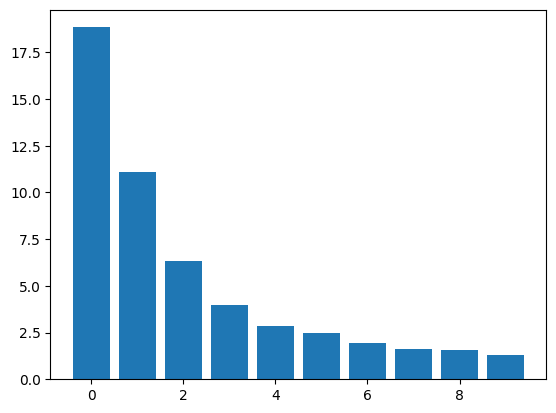

In [35]:
plt.bar(x = range(10), height=l[:10]);

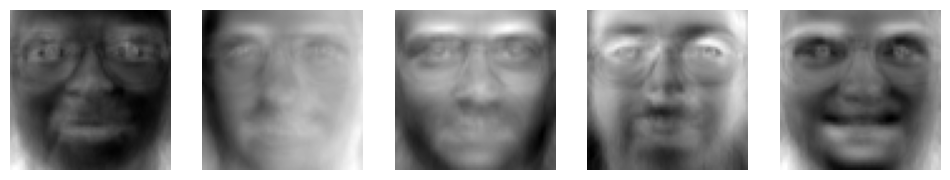

In [36]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(Q[:, i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

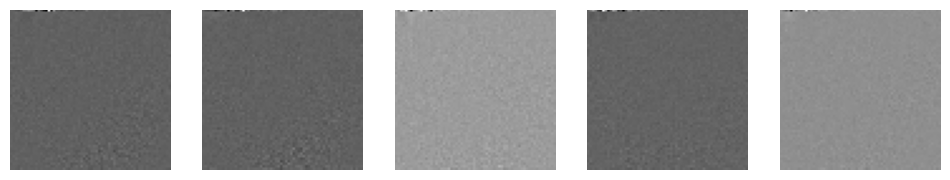

In [37]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(-5, 0):
    ax[i].imshow(Q[:, i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

In [38]:
faces_projected = faces_centered @ Q
faces_projected.shape

(400, 4096)

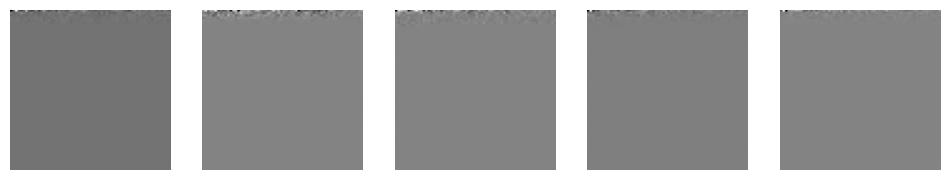

In [39]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(faces_projected[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

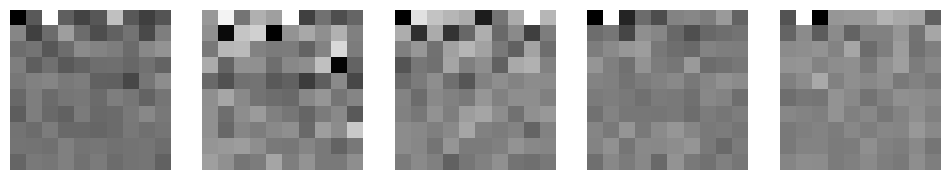

In [40]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(faces_projected[i][:100].reshape(10, 10), cmap='gray')
    ax[i].axis('off')

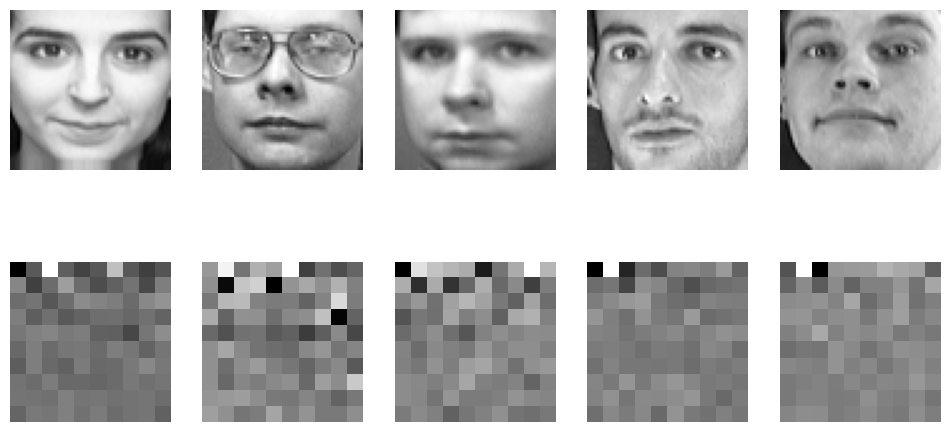

In [41]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    ax[0, i].imshow(faces[i].reshape(64, 64), cmap='gray')
    ax[1, i].imshow(faces_projected[i][:100].reshape(10, 10), cmap='gray')
    ax[0, i].axis('off')
    ax[1, i].axis('off')

In [42]:
Q_inv = np.linalg.inv(Q)

In [43]:
faces_reconstructed = faces_projected @ Q_inv
faces_reconstructed = faces_reconstructed + mean
faces_reconstructed.shape

(400, 4096)

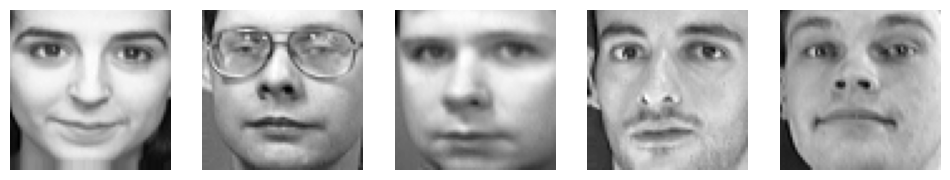

In [44]:
fig, ax = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax[i].imshow(faces_reconstructed[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')

# Singular value decomposition

In [46]:
!wget https://upload.wikimedia.org/wikipedia/commons/7/73/Beach_at_Fort_Lauderdale.jpg

--2025-02-04 13:08:57--  https://upload.wikimedia.org/wikipedia/commons/7/73/Beach_at_Fort_Lauderdale.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1080250 (1.0M) [image/jpeg]
Saving to: ‘Beach_at_Fort_Lauderdale.jpg.1’

Beach_at_Fort_Laude 100%[===================>]   1.03M  6.66MB/s    in 0.2s    

2025-02-04 13:08:57 (6.66 MB/s) - ‘Beach_at_Fort_Lauderdale.jpg.1’ saved [1080250/1080250]



©  [Imagem](https://en.wikipedia.org/wiki/File:Beach_at_Fort_Lauderdale.jpg) | Daniel Dudek | [CC-BY-2.0](https://creativecommons.org/licenses/by/2.0/)

(1707, 2560, 3)


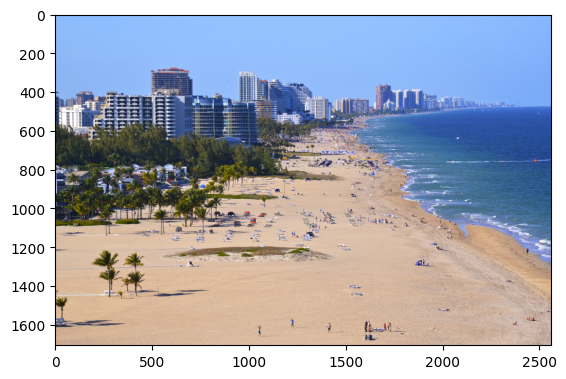

In [47]:
image = mpimg.imread('/content/Beach_at_Fort_Lauderdale.jpg')
print(image.shape)
plt.imshow(image)

1707 2560


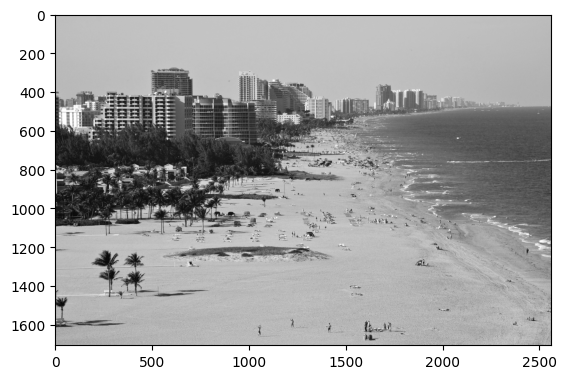

In [48]:
image = image.mean(axis = 2)
w, h = image.shape
print(w, h)
plt.imshow(image, cmap='gray')

In [49]:
1707 * 2560

4369920

In [50]:
U, S, Vh = np.linalg.svd(image, full_matrices=False)
U.shape, S.shape, Vh.shape

((1707, 1707), (1707,), (1707, 2560))

In [51]:
S[:10]

array([338398.20882467,  38654.39530355,  25732.27676934,  17468.67159827,
        16552.51203545,  15448.33028363,  12402.71972407,  12050.19579419,
        11730.93082557,  10388.41173098])

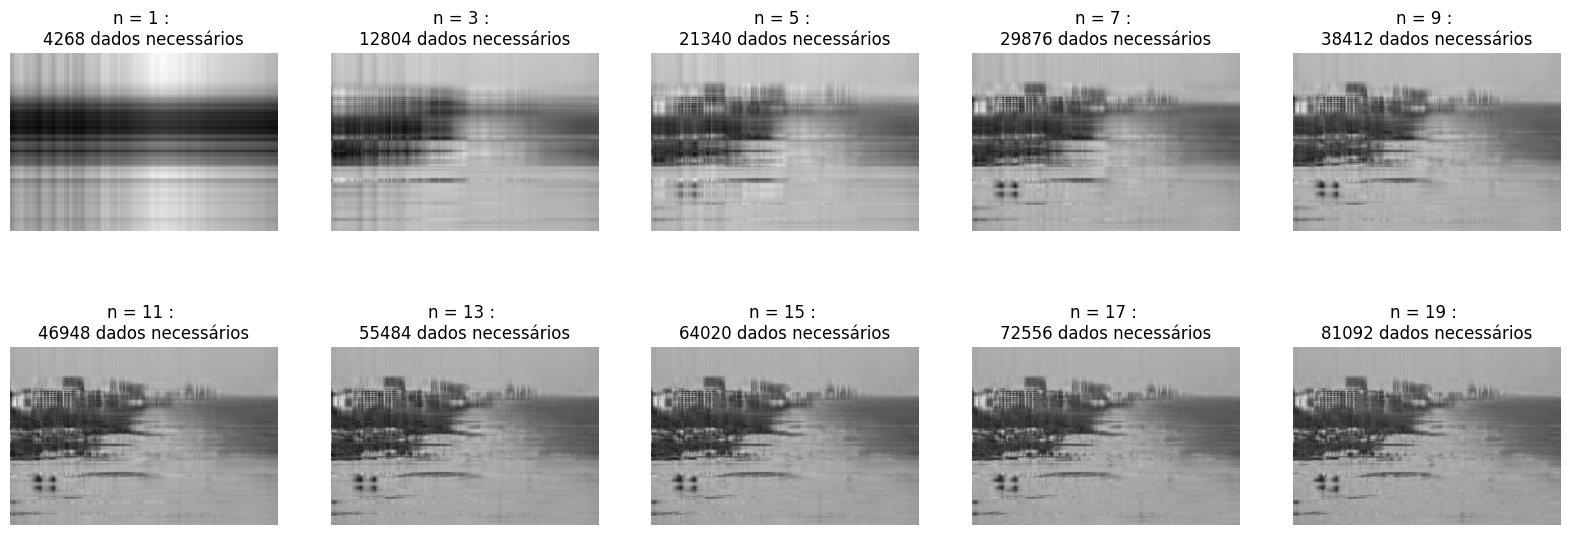

In [54]:
fig, axes = plt.subplots(2, 5, figsize=(20,7))
for i, n in enumerate(range(1, 20, 2)):
  #print(i, n)
  ax = axes.flatten()[i]
  U_n = U[:, :n]
  S_n = np.diag(S[:n])
  Vh_n = Vh[:n, :]
  image_reconstructed = U_n @ S_n @Vh_n
  ax.imshow(image_reconstructed, cmap = 'gray')
  ax.axis('off')
  ax.set_title(f'n = {n} : \n{w * n + n + h * n} dados necessários')

In [55]:
(81092/4369920) * 100

1.855686145284124

# PCA

In [56]:
iris = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)

In [58]:
X, y = iris

In [59]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [60]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
iris_scaled = X_scaled.copy()
iris_scaled['target'] = y
iris_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


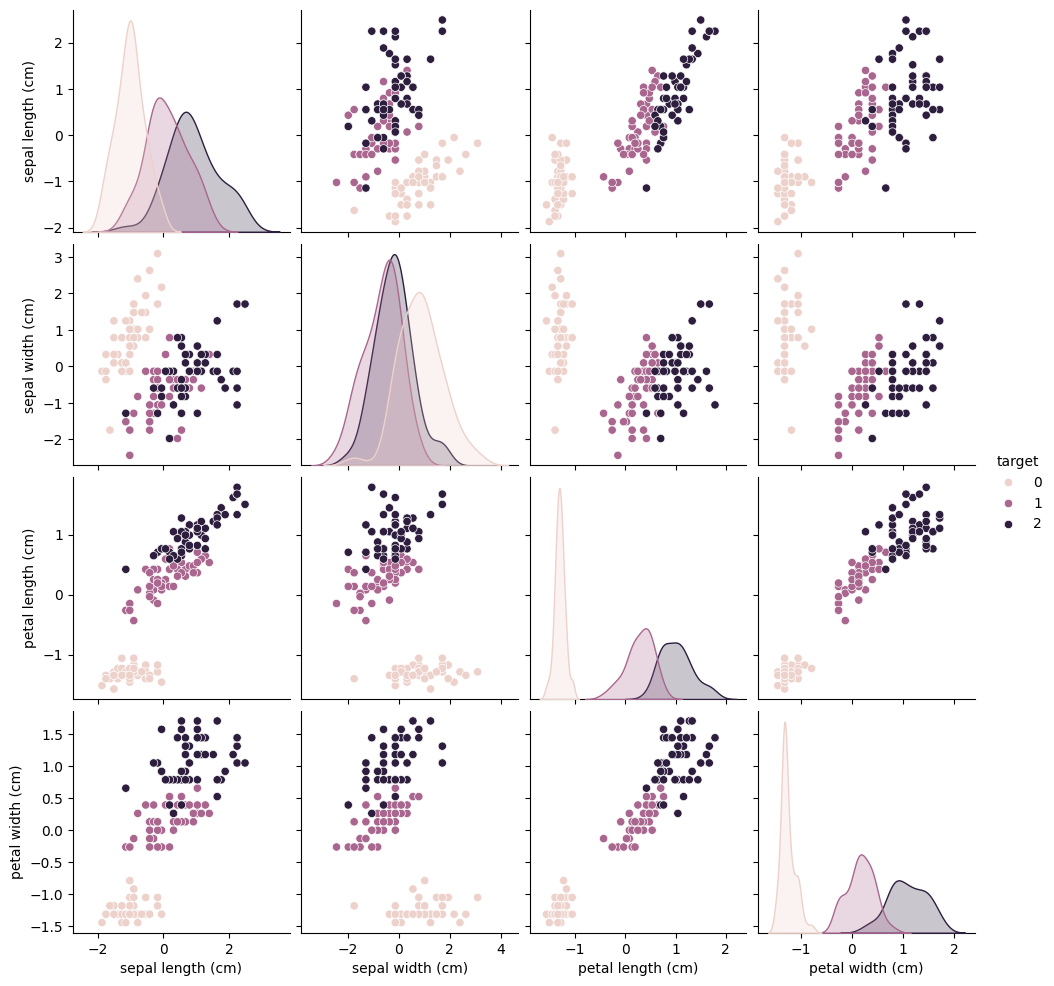

In [62]:
sns.pairplot(iris_scaled, hue = "target")

In [63]:
pca = PCA()
pca.fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)
X_scaled_pca = pd.DataFrame(X_scaled_pca, columns=[f'PC{i}' for i in range(1, 5)])

In [64]:
X_scaled_pca

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,0.127706,-0.024168
1,-2.080961,-0.674134,0.234609,-0.103007
2,-2.364229,-0.341908,-0.044201,-0.028377
3,-2.299384,-0.597395,-0.091290,0.065956
4,-2.389842,0.646835,-0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,-0.256274,-0.389257
146,1.564580,-0.896687,0.026371,-0.220192
147,1.521170,0.269069,-0.180178,-0.119171
148,1.372788,1.011254,-0.933395,-0.026129


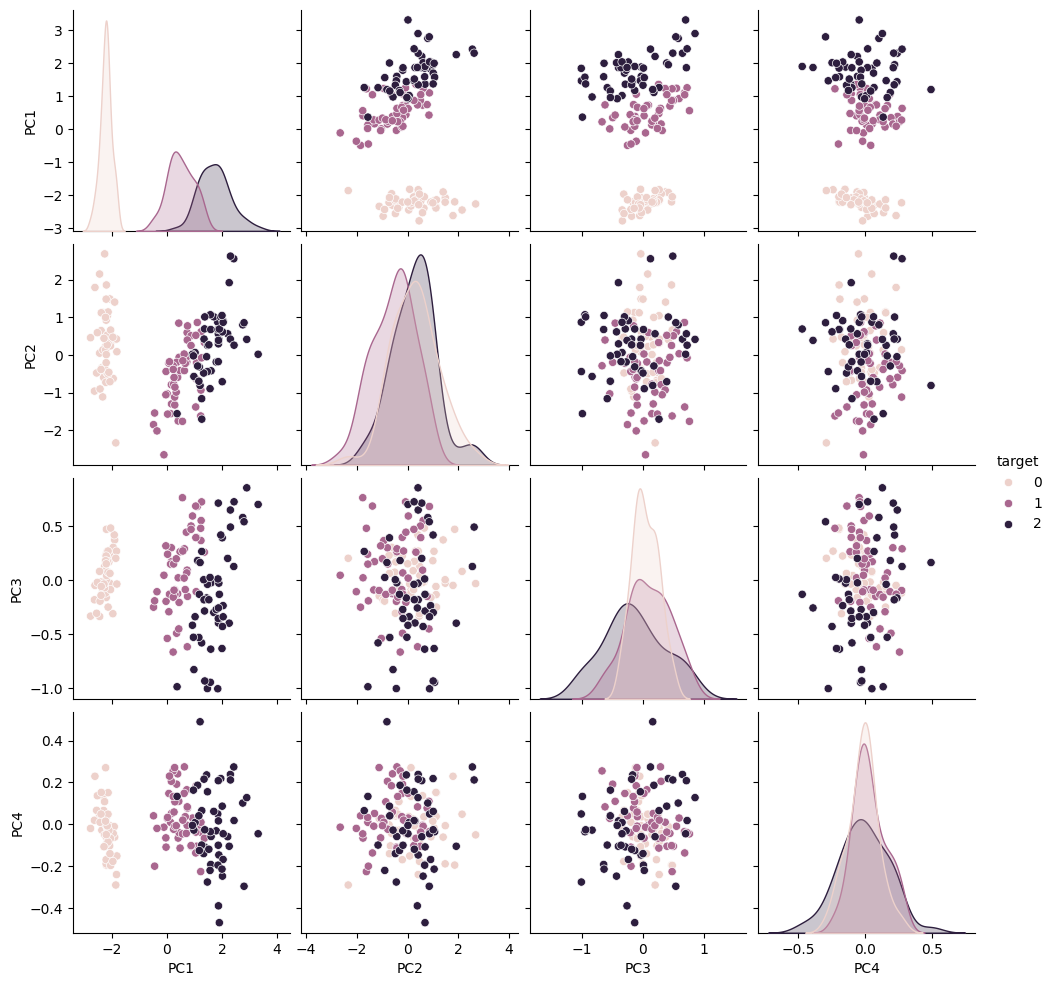

In [65]:
iris_scaled_pca = X_scaled_pca.copy()
iris_scaled_pca['target'] = y
sns.pairplot(iris_scaled_pca, hue='target')

In [66]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [67]:
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Text(0, 0.5, 'PC2')

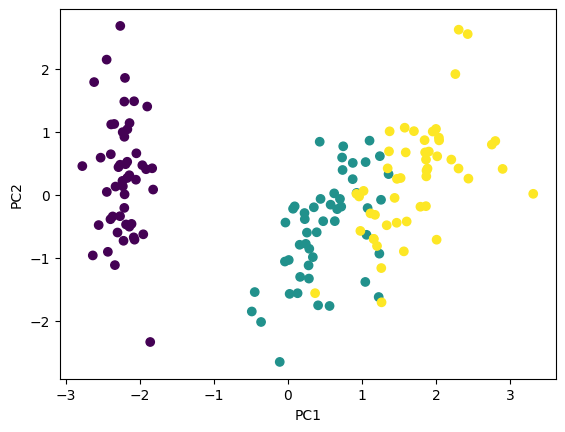

In [68]:
plt.scatter(X_scaled_pca['PC1'], X_scaled_pca['PC2'], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Semelhança entre dados estruturados

In [69]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [70]:
sentences = [
    # sports:
    "The quarterback completed a stunning 75-yard touchdown pass in the final seconds of the game.",
    "The tennis player's serve was clocked at an astonishing 140 miles per hour.",
    "The basketball team clinched their fifth consecutive championship title.",
    "The soccer player scored a hat-trick in his debut match for the national team.",
    "The baseball player hit a home run over the left-field fence.",
    # movies:
    "The highly anticipated sequel to the blockbuster superhero movie is set to hit theaters next summer.",
    "The acclaimed director is working on a new biopic about the life of a famous artist.",
    "The cast of the popular TV series will reunite for a special reunion episode.",
    "The movie's box office performance exceeded all expectations, becoming the highest-grossing film of the year.",
    "The critically acclaimed indie film has been nominated for several Academy Awards.",
    # politics:
    "The newly elected president announced plans to increase government spending on education and healthcare.",
    "The opposition party has called for a vote of no confidence in the prime minister.",
    "The foreign minister met with her counterpart from a neighboring country to discuss regional security issues.",
    "The scandal involving the former minister has led to calls for his resignation.",
    "The government has introduced a new law aimed at reducing corruption and improving transparency."
]

In [73]:
embeddings = model.encode(sentences)
embeddings.shape

(15, 384)

In [75]:
embeddings[14]

array([-2.72689965e-02,  1.95994124e-01,  5.68615831e-02, -2.16209292e-01,
        8.66641030e-02,  9.26355422e-02, -1.61811575e-01, -1.00807220e-01,
       -1.38358116e-01,  2.09858015e-01,  2.88403273e-01,  2.13497907e-01,
        8.92936885e-02, -1.79097787e-01,  2.65215456e-01, -2.70127971e-02,
        2.77524479e-02,  4.99372542e-01, -2.78269202e-01, -1.38458252e-01,
        4.83311146e-01, -1.16340160e-01, -2.41576731e-01,  6.52905107e-02,
       -2.22724780e-01, -9.18722749e-02, -1.52404919e-01, -3.73496145e-01,
        4.90291752e-02, -2.54510552e-01,  8.31764564e-02, -9.32255760e-02,
        3.03164721e-01, -4.61889841e-02,  4.74556070e-03, -2.41209224e-01,
        2.60904342e-01,  4.77362126e-02, -3.86935845e-02,  7.30582774e-02,
        1.75052851e-01, -2.93106228e-01, -1.42270267e-01, -8.73037428e-02,
       -1.34648740e-01,  1.09449439e-01,  2.38659039e-01, -4.52052467e-02,
       -2.25569960e-02, -3.15871328e-01, -2.99560130e-01,  1.31039515e-01,
        5.11910282e-02,  

In [76]:
similarity = cosine_similarity(embeddings)
similarity.shape

(15, 15)

In [ ]:
similarity

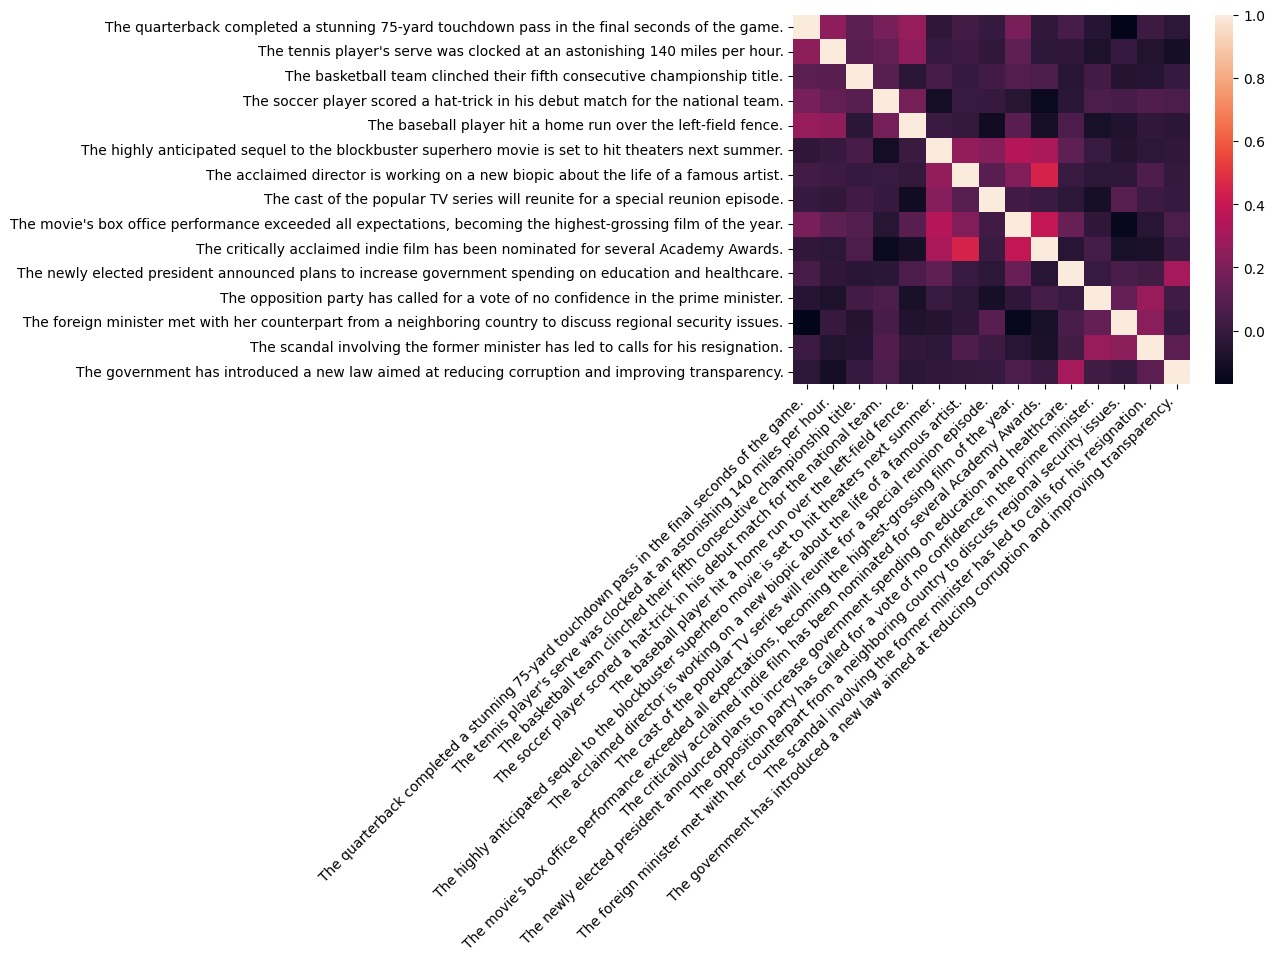

In [78]:
sns.heatmap(similarity, xticklabels=sentences, yticklabels=sentences)
plt.xticks(ha = 'right', rotation = 45);